# ImbalancedLearningRegression (0.0.1): Usage
---
## SMOGNBoost
Amit Shanbhoug, 8677407 \
Adapted from Nick Kunz's SMOGN package: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_1_beg.ipynb


## Installation

First, we install ImbalancedLearningRegression from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [4]:
%%capture
## suppress install output

## install pypi release
# !pip install ImbalancedLearningRegression

## install developer version
#!pip install git+https://github.com/paobranco/ImbalancedLearningRegression.git

## Dependencies
Next, we load the required dependencies. Here we import `ImbalancedLearningRegression` to later apply Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise. In addition, we use `pandas` for data handling, and `seaborn` to visualize our results.

In [5]:
## load dependencies
## load libraries
import numpy as np
import pandas as pd
import sklearn
import math
import smogn as smogn
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn
import matplotlib.pyplot as plt
from ImbalancedLearningRegression import *

## Data
Below, we load our data (College Data set), which can be found on the website for the main course textbook("An Introduction to Statistical Learning with Applications in R") James et al. http://www-bcf.usc.edu/~gareth/ISL/data.html. It contains a number of variables for 777 different universities and colleges in the US. In this case, we name our training set `college`.


In [6]:
## red_wine
data = pd.read_csv(
    "https://raw.githubusercontent.com/paobranco/ImbalancedLearningRegression/master/data/red_wine.csv"
)


## Introduction to SMOTE
Here we cover the focus of this example. We call the `smote` function from this package (`ImbalancedLearningRegression.smote`) and satisfy the minimum required arguments: `data` and `y`.

* The `data` argument takes a Pandas DataFrame, which contains the training set split. In this example, we input the previously loaded `college` training set with follow input: `data = college`

* The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this example, we input `'Grad.Rate'` to focus on predicting the graduation rate of different US colleges, with the following input: `y = 'Grad.Rate'`

In [7]:
## conduct smote
smogn = gn(
    ## main arguments
    data = data,  ## pandas dataframe
    y = "quality"  ## string ('header name')
)

r_index: 100%|##########| 98/98 [00:00<00:00, 112.71it/s]


**Note:**

In this example, the regions of interest within the response variable `y` are automatically determined by the box plot extremes. The extreme values are considered rare "minorty" values are over-sampled. 

If there are no box plot extremes contained in the reponse variable `y`, the argument `rel_method = manual` must be specified, and an input matrix must be placed into the argument `rel_ctrl_pts_rg` indicating the regions of rarity in `y`.

More information regarding the matrix input to the `rel_ctrl_pts_rg` argument and manual over-sampling can be found within the function's doc string, as well as in Nick Kunz's package SMOGN: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_3_adv.ipynb.

It is also important to mention that by default, `ImbalancedLearningRegression.smote` will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values. This feature can be changed with the boolean arguments `drop_na_col = False` and `drop_na_rows = False`.

## Results
After conducting Synthetic Minority Over-Sampling Technique for Regression, we briefly examine the results. 

We can see that the number of observations (rows) in the original training set increased from 777 to 899, while the number of features (columns) remains the same. 

Recall that `ImbalancedLearningRegression.smote` automatically removes features containing missing values. In this case, no features contained missing values.

The increase in observations were a result of over-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.




In [8]:
## dimensions - original data 
data.shape

(1599, 12)

In [9]:
## dimensions - modified data
smogn.shape

(1598, 12)

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`ImbalancedLearningRegression.box_plot_stats`) we quickly verify.

Notice that the modified training set's box plot five number summary has changed, where the distribution of the response variable has *skewed left* when compared to the original training set.

In [10]:
## box plot stats - original data 
box_plot_stats(data["quality"])['stats']

array([4., 5., 6., 6., 7.])

In [11]:
## box plot stats - modified data
box_plot_stats(smogn["quality"])['stats']

array([4., 5., 6., 6., 7.])

Plotting the results of both the original and modified training sets, the *skewed left* distribution of the response variable in the modified training set becomes more evident.

In this example, SMOTE over-sampled observations whose `'Grad.Rate'` was found to be extremely high according to the box plot (those considered "minority").

This is the quickest implementation when the `y` values of interest in predicting may be unclear within a given dataset.



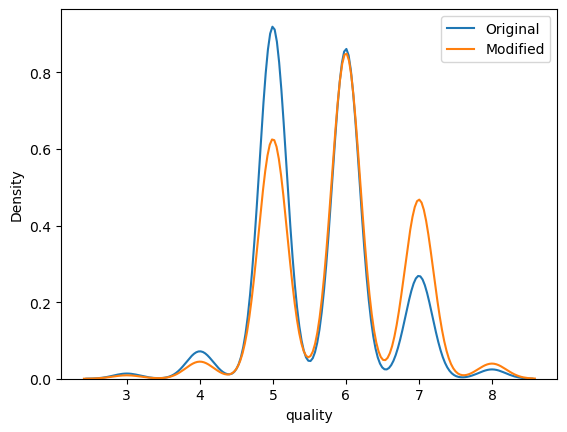

In [12]:
## plot y distribution 
smogn.reset_index(inplace=True)
seaborn.kdeplot(data["quality"], label="Original")
seaborn.kdeplot(smogn["quality"], label="Modified")
plt.legend(labels=["Original","Modified"])
plt.show()

## Conclusion
In this example, we covered the fundamentals of SMOTE. We utilized the College Dataset to conduct Synthetic Minority Over-Sampling Technique for Regression with the minimum required arguments. 

SMOTE over-sampled "minority" values in a continuous response variable. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.

## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

Torgo, L., Ribeiro, R. P., Pfahringer, B., & Branco, P. (2013, September). Smote for regression. In Portuguese conference on artificial intelligence (pp. 378-389). Springer, Berlin, Heidelberg. https://researchcommons.waikato.ac.nz/bitstream/handle/10289/8518/smoteR.pdf?sequence=23

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.1.0). Python Package Index.
https://pypi.org/project/smogn. 

Gareth, J., Daniela, W., Trevor, H., & Robert, T. (2013). An introduction to statistical learning: with applications in R. Spinger.
http://www-bcf.usc.edu/~gareth/ISL/data.html.

